<div class="alert alert-block alert-info">

## <center> <b> Stock Sentiment </center>
## <center> Predicting market behavior from tweets </center> <br>
##  <center> <b> EDA </center> <br>
## <center> Spring Semester 2024-2025 <center>

<center> Group 35: <center>
<center>Joana Esteves, 20240746 <br><center>
<center>José Cavaco, 20240513 <br><center>
<center> Leonardo Di Caterina 20240485<br><center>
<center>Matilde Miguel, 20240549 <br><center>
<center>Rita Serra, 20240515 <br><center>

<div>

**Table of Contents**
- [1. Import the needed Libraries](#importlibraries)
- [2. Import Dataset](#importdataset)
- [3. Exploratory Analysis](#section_3)


<a class="anchor" id="importlibraries">

# 1. Import the needed Libraries

</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from langdetect import detect
import emoji

<a class="anchor" id="importdataset">

# 2. Import the dataset

</a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# base_path= '/content/drive/MyDrive/TM Project/'

base_path = "Data/"

In [3]:
train_df = pd.read_csv(base_path+ 'train.csv')
test_df = pd.read_csv(base_path+ 'test.csv')

In [5]:
train_df.head()

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0


<a class="anchor" id="section_3">

# 3. Exploratory Analysis

</a>

In [13]:
train_df.shape

(9543, 2)

### Missing Values

In [14]:
train_df.isna().sum()

text     0
label    0
dtype: int64

There are no missing values ​​in the train data.

### Target Exploration

Check unique values for the target labels:

In [8]:
train_df['label'].unique()

array([0, 1, 2])

In [9]:
label_distribution= train_df['label'].value_counts()
label_distribution

,count
label,
2,6178
1,1923
0,1442


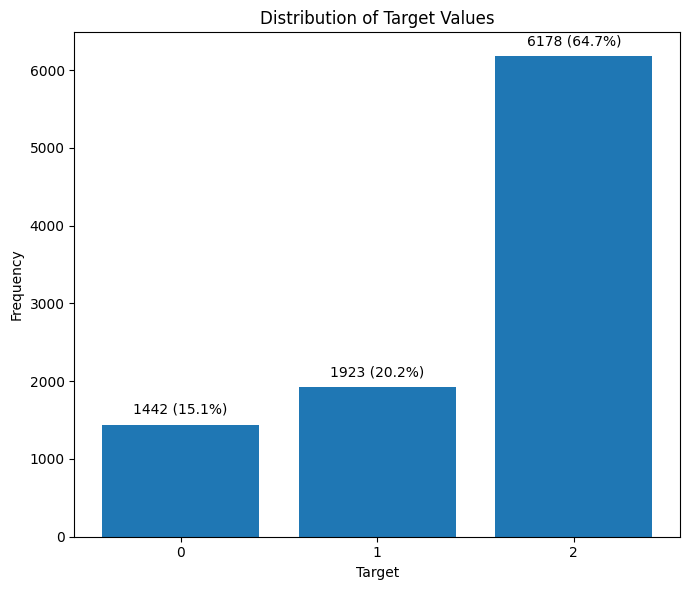

In [10]:
# Compute counts and proportions
label_counts = train_df['label'].value_counts().sort_index()
label_props = train_df['label'].value_counts(normalize=True).sort_index() * 100

# Plot
plt.figure(figsize=(7, 6))
bars = plt.bar(label_counts.index.astype(str), label_counts.values)

# Add text labels (value + %)
for bar, count, prop in zip(bars, label_counts.values, label_props.values):
    label = f"{count} ({prop:.1f}%)"
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, label,
             ha='center', va='bottom', fontsize=10)

# Labels and title
plt.title('Distribution of Target Values')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


The dataset is imbalanced, with class 2 representing the majority of the data.

### Text Exploration

In [18]:
train_df["char_len"] = train_df["text"].str.len()
train_df['word_count']  = train_df['text'].apply(lambda x: len(str(x).split()))

In [20]:

train_df.head()

,text,label,word_count,char_len
0,$BYND - JPMorgan reels in expectations on Beyo...,0,10,77
1,$CCL $RCL - Nomura points to bookings weakness...,0,14,102
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0,14,94
3,$ESS: BTIG Research cuts to Neutral https://t....,0,7,59
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0,10,71


In [14]:
example = train_df['text'].iloc[0]
print(example)
print("Word:", len(example.split()))

$BYND - JPMorgan reels in expectations on Beyond Meat https://t.co/bd0xbFGjkT
Word: 10


In [15]:
total = train_df['word_count'].sum()
print(total)

116218


In [24]:
train_df[['word_count','char_len']].describe()

,word_count,char_len
count,9543.000000,9543.000000
mean,12.178351,85.816934
std,4.665599,35.097229
min,1.000000,2.000000
25%,9.000000,58.000000
50%,11.000000,79.000000
75%,15.000000,120.000000
max,32.000000,190.000000


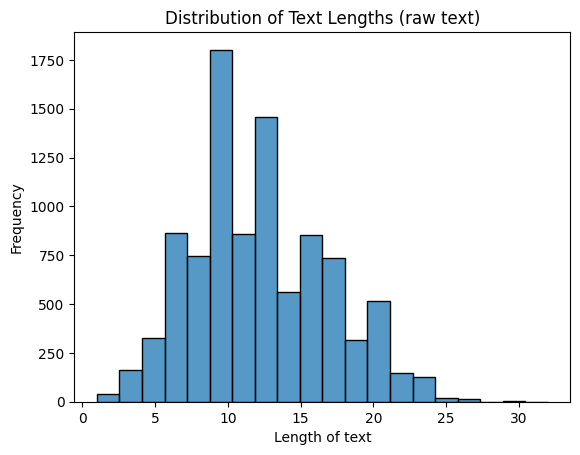

In [17]:
#Plot distribution of text length
sns.histplot(train_df['word_count'], bins=20)
plt.title("Distribution of Text Lengths (raw text)")
plt.xlabel("Length of text")
plt.ylabel("Frequency")
plt.show()

In [26]:
all_words = ' '.join(train_df['text']).split()
freq = pd.Series(all_words).value_counts()
freq.sort_values(ascending=False)[0:10]

,count
to,2332
the,1820
of,1464
-,1390
in,1361
on,1136
for,1032
a,970
and,898
The,663


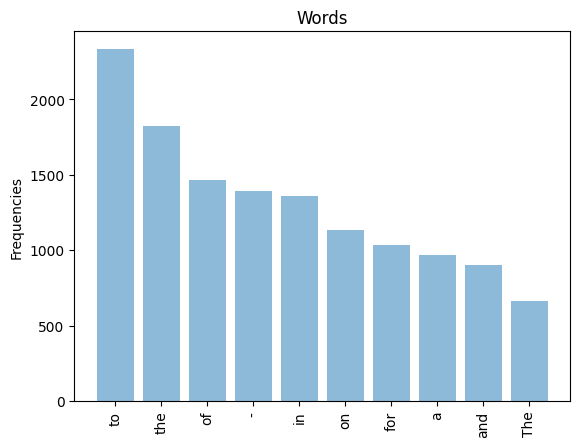

In [27]:
x_labels = freq.index[0:10]
values = freq[:10]
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()

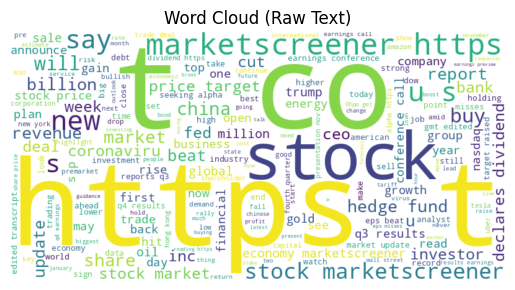

In [28]:
# Create a word cloud from the raw text
raw_text = ' '.join(train_df['text'].fillna('')).lower()
raw_wc = WordCloud(width=800, height=400, background_color='white').generate(raw_text)
plt.imshow(raw_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Raw Text)')
plt.show()

In [33]:
train_df["has_ticker"] = train_df["text"].str.contains(r"\$\w+")
train_df["has_link"] = train_df["text"].str.contains("https")
train_df["has_mention"] = train_df["text"].str.contains("@")
train_df["has_hashtag"] = train_df["text"].str.contains("#")

In [37]:
bool_variable=["has_ticker","has_link","has_mention","has_hashtag"]
for var in bool_variable:
  print(train_df[var].value_counts())

has_ticker
False    7261
True     2282
Name: count, dtype: int64
has_link
False    5073
True     4470
Name: count, dtype: int64
has_mention
False    9249
True      294
Name: count, dtype: int64
has_hashtag
False    8647
True      896
Name: count, dtype: int64


### Text Length Distribution per Sentiment

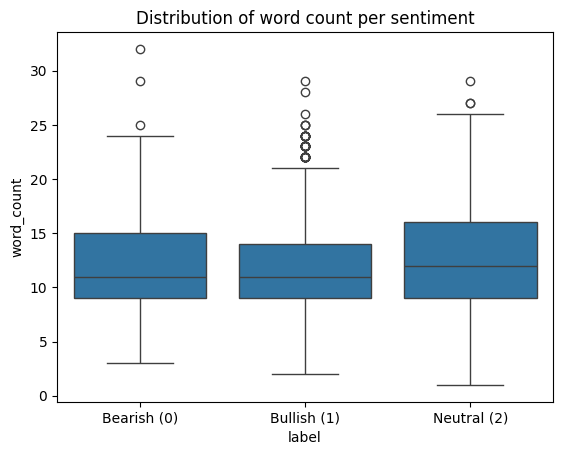

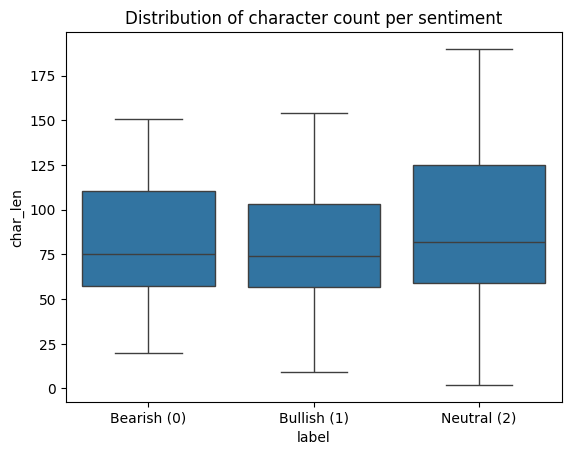

In [38]:
# Number of words
sns.boxplot(x="label", y="word_count", data=train_df)
plt.title("Distribution of word count per sentiment")
plt.xticks([0,1,2], ["Bearish (0)", "Bullish (1)", "Neutral (2)"])
plt.show()

# Number of characters
sns.boxplot(x="label", y="char_len", data=train_df)
plt.title("Distribution of character count per sentiment")
plt.xticks([0,1,2], ["Bearish (0)", "Bullish (1)", "Neutral (2)"])
plt.show()


### Patterns

In [51]:
email_patterns =  re.compile(r'\b[\w.-]+?@\w+?\.\w+?\b')
cost_pattern = re.compile(r'[$€£]\d+(?:[\.,]?\d+)?')
url_pattern = re.compile(r'http\S+|www\S+|https\S+')
hashtag_pattern = re.compile(r'#\w+')
user_tag_pattern = re.compile(r'@\w+')
ticker_pattern = re.compile(r'\$[A-Z]{1,6}\b')
elongation_word_pattern = re.compile(r"\b[a-zA-Z]*([a-zA-Z])\1{2,}")

In [52]:
def check_patterns(df, text_col='text'):
    patterns = {
        'EMAIL': email_patterns,
        'COST': cost_pattern,
        'URL': url_pattern,
        'HASHTAG': hashtag_pattern,
        'USER': user_tag_pattern,
        # dollar sign followed by 1 to 6 capital letters
        'TICKER': ticker_pattern,
        # Extra chars (only letters)
        'ELONG': elongation_word_pattern,
    }

    result = {}
    for label, pattern in patterns.items():
        result[label] = df[text_col].apply(lambda x: bool(re.search(pattern, str(x)))).any()
    return result

In [53]:
patterns = check_patterns(train_df, text_col='text') 
print(patterns)

{'EMAIL': np.False_, 'COST': np.True_, 'URL': np.True_, 'HASHTAG': np.True_, 'USER': np.True_, 'TICKER': np.True_, 'ELONG': np.True_}


In [54]:
def get_elongated_words(text):
    return [match.group(0) for match in elongation_word_pattern.finditer(str(text))]

elongated_words = train_df["text"].apply(get_elongated_words).explode().dropna().unique().tolist()

print("Elongated words found:")
print(elongated_words)

Elongated words found:
['BBB', 'RRR', 'PPP', 'Coffeee', 'III', 'rrr', 'GGG', 'StWqqq', 'Dolll', 'QQQ', 'xpAujlll', 'SSS', 'Sweeeeeeeeeetttttt', 'AAA', 'CCC', 'xJJJJ', 'TQQQ', 'DOOO', 'shhh', 'YoBeee']


- Most cases detected are not words elongations, so we may not consider this pattern in preprocessing.

In [55]:
def get_user_tags(text):
    return [match.group(0) for match in user_tag_pattern.finditer(str(text))]

user_tags = train_df["text"].apply(get_user_tags).explode().dropna().unique().tolist()

print("User tags found:")
print(user_tags)

User tags found:
['@WorldBank', '@TimLampkin', '@higherpurposeco', '@flacqua', '@bcheungz', '@CNBCAfrica', '@FedFRASER', '@mdbaccardax', '@CMEGroup', '@bopinion', '@USTreasury', '@RichMiller28', '@EdLudlow', '@YahooFinance', '@heidi_chung', '@BlackBox_Team', '@benzinga', '@stitchfix', '@luxury', '@realDonaldTrump', '@JimCramer', '@Nasdaq', '@ElonMusk', '@brianreports', '@readDanwrite', '@BW', '@business', '@bridgetteAwebb', '@MakerDAO', '@rickjnewman', '@CNBCMakeIt', '@SibileTV', '@TradingNation', '@TonyTheStreet', '@MaleehaMBCC', '@Street_Insider', '@OscarWGrut', '@GitaGopinath', '@BreakingViews', '@InvescoUS', '@NewConstructs', '@Jefferies', '@davidfickling', '@IATA', '@AnjKhem', '@suntrust', '@WellsFargo', '@GiteshPandya', '@SamRo', '@GoldmanSachs', '@UN_Women', '@justbobbibrown', '@Giants', '@RobinhoodSnacks', '@Discover_Pods', '@aztecs99', '@bcope51', '@CNBCselect', '@Coldplay', '@RevShark', '@Roku', '@SecAzar', '@SussexUni', '@Sweetgreen', '@HeyTammyBruce', '@MikeCaymanTrades', '

In [56]:
def get_costs(text):
    return [match.group(0) for match in cost_pattern.finditer(str(text))]

costs = train_df["text"].apply(get_costs).explode().dropna().unique().tolist()

print("Costs found:")
print(costs)

Costs found:
['$35', '$39', '$97', '$100', '$1.00', '$1.75', '$86', '$172', '$50', '$65', '$80', '$105', '$8', '$12', '$9.00', '$12.25', '$10', '$25', '$30', '$32', '$13', '$16', '$34', '$5', '$6', '$237', '$240', '$48', '$52', '$53', '$20', '$28', '$33', '$58', '$70', '$7', '$11', '$14', '$9', '$405', '$415', '$135', '$124', '$133', '$3', '$90', '$95', '$57', '$79', '$315', '$290', '$318', '$310', '$36', '$305', '$54', '$4', '$265', '$235', '$330', '$300', '$255', '$203', '$87', '$84', '$40', '$24', '$49', '$38', '$56', '$392', '$320', '$410', '$350', '$427', '$406', '$23.50', '$120', '$111', '$47', '$43', '$130', '$103', '$72', '$85', '$46', '$2.25', '$2.00', '$104', '$82', '$41', '$51', '$238', '$202', '$55', '$168', '$163', '$325', '$115', '$110', '$60', '$117', '$1', '$225', '$363', '$319', '$62', '$165', '$280', '$260', '$222', '$107', '$99', '$113', '$106', '$155', '$259', '$41.50', '$39.50', '$6.00', '$5.50', '$139', '$128', '$23', '$22', '$26', '$75', '$322', '$274', '$159', '

In [ ]:
def get_urls(text):
    return [match.group(0) for match in url_pattern.finditer(str(text))]

urls = train_df["text"].apply(get_urls).explode().dropna().unique().tolist()

print("Urls found:")
print(urls)

Urls found:
['https://t.co/bd0xbFGjkT', 'https://t.co/yGjpT2ReD3', 'https://t.co/KN1g4AWFIb', 'https://t.co/MCyfTsXc2N', 'https://t.co/z37IJmCQzB', 'https://t.co/XKcPDilIuU', 'https://t.co/tdUfG5HbXy', 'https://t.co/7Fv1ZiFZBS', 'https://t.co/rlnEwzlzzS', 'https://t.co/LurHBEadeU', 'https://t.co/wU5P2i8WBU', 'https://t.co/YsvsMSQRIb', 'https://t.co/8yrbwAjLKG', 'https://t.co/mJ1eSrsFXJ', 'https://t.co/0BFQy4ZU6W', 'https://t.co/Ul2S6XNXw8', 'https://t.co/qlFxZuhkrt', 'https://t.co/PdPkgLk0FQ', 'https://t.co/eoq7Lchtk4', 'https://t.co/WrQXTC38nB', 'https://t.co/Ky3d8DxnjX', 'https://t.co/NKYQgy2o3J', 'https://t.co/APfxEqSSRF', 'https://t.co/hsWCvJb1Ct', 'https://t.co/PlbSaE1Nc2', 'https://t.co/InJKourtW3', 'https://t.co/NGkYTADOSt', 'https://t.co/NhiYwphBQd', 'https://t.co/jMJ3N4A06T', 'https://t.co/vuNpYwRDSg', 'https://t.co/niUwYR5YUD', 'https://t.co/WnCksfl1gX', 'https://t.co/MfhnyZe593', 'https://t.co/1adfDkHeaw', 'https://t.co/d4TGqrNi7Y', 'https://t.co/pyARTEahWH', 'https://t.co/u

In [ ]:
def get_hashtags(text):
    return [match.group(0) for match in hashtag_pattern.finditer(str(text))]

hashtags = train_df["text"].apply(get_hashtags).explode().dropna().unique().tolist()

print("Hashtags found:")
print(hashtags)

Hashtags found:
['#Samp', '#economy', '#MarketScreener', '#BankofNovaScotia', '#FedReport', '#IMFBlog', '#G20', '#markets', '#investing', '#MustRead', '#Survey', '#CESEE', '#FreeZeroHedge', '#taux', '#BankofIreland', '#Stock', '#BankofJamaica', '#BankofJapan', '#BankofQueensland', '#business', '#trading', '#currency', '#OpportunityOccupations', '#collegedegree', '#stocks', '#HellenicExchanges', '#Somalia', '#MENA', '#Tunisia', '#FOMC', '#FedData', '#Parkmead', '#stockmarket', '#SaudiArabianMonetaryAgency', '#COVID19', '#NorthMacedonia', '#Airbus', '#FinnairOyj', '#IFA', '#Nutrien', '#Cybertruck', '#Unilever', '#AmaniGold', '#engage', '#ElonMusk', '#baron', '#finance', '#AbbVie', '#ActinogenMedical', '#ADXEnergy', '#AgatiFund', '#AlacerGold', '#AllianceTrust', '#AmericanAirlines', '#AngloAustralianResourcesNL', '#ArborRealtyTrust', '#ArmourEnergy', '#AssetOwl', '#AtlasArteria', '#AudaxRenovablesSA', '#AUDI', '#AudioCodes', '#AuroraCannabis', '#AusQuest', '#AustarGold', '#Aveo', '#AvitaM

### Emojis

In [71]:
has_any_emoji = train_df["text"].apply(lambda x: bool(emoji.emoji_list(str(x)))).any()

if has_any_emoji:
  print(f"There are emojis in the dataset:")

  # Create a copy with only the rows that contain emojis
  train_df_emojis = train_df[train_df["text"].apply(lambda x: bool(emoji.emoji_list(str(x))))].copy()

  # Optionally add a column to show extracted emojis
  train_df_emojis["emojis"] = train_df_emojis["text"].apply(lambda x: [d["emoji"] for d in emoji.emoji_list(str(x))])

  # Preview
  print(train_df_emojis[["text", "emojis"]].head())

  percent = len(train_df_emojis) / len(train_df) * 100
  print(f"\nPercentage of tweets with emojis: {percent:.2f}%")

There are emojis in the dataset:
                                                   text emojis
451   eib: #MustRead➡️EIB Bank Lending #Survey for #...   [➡️]
622   LIVE: Fed Chair Jerome Powell speaks on today'...   [▶️]
993     Invora™ Herbicide Receives EPA Federal Approval    [™]
1261  Applied DNA Announces Issuance of U.S. Patent ...    [®]
1350   Carvana Brings The New Way to Buy a Car™ to Utah    [™]

Percentage of tweets with emojis: 0.56%


In [86]:
def apply_demojize(df, text_col='text'):
    df[text_col] = df[text_col].apply(lambda x: emoji.demojize(str(x)))
    return df

In [ ]:
train_df_demojized = train_df.copy()

apply_demojize(train_df_demojized)

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0
...,...,...
9538,The Week's Gainers and Losers on the Stoxx Eur...,2
9539,Tupperware Brands among consumer gainers; Unil...,2
9540,vTv Therapeutics leads healthcare gainers; Myo...,2
9541,"WORK, XPO, PYX and AMKR among after hour movers",2


In [90]:
demojize_pattern = re.compile(r":([a-zA-Z0-9_]+):")

def get_demojize(text):
    return [match.group(0) for match in demojize_pattern.finditer(str(text))]

demojized = train_df_demojized["text"].apply(get_demojize).explode().dropna().unique().tolist()

print("Demogized found:")
print(demojized)

Demogized found:
[':right_arrow:', ':play_button:', ':trade_mark:', ':registered:', ':avocado:', ':copyright:', ':high_voltage:', ':sun:', ':snowflake:', ':school:', ':transgender_symbol:', ':Christmas_tree:', ':thinking_face:', ':check_mark_button:', ':palm_tree:', ':chart_increasing:', ':thumbs_up:', ':flushed_face:', ':female_sign:', ':turtle:', ':black_small_square:', ':musical_notes:', ':Chile:', ':North_Korea:', ':microphone:', ':newspaper:', ':headphone:', ':racing_car:', ':national_park:', ':mobile_phone:', ':face_with_medical_mask:', ':recycling_symbol:', ':bell:', ':up_arrow:', ':counterclockwise_arrows_button:', ':United_States:', ':grinning_face:', ':eyes:', ':waving_hand:']


In [92]:
has_any_emoji = train_df_demojized["text"].apply(lambda x: bool(emoji.emoji_list(str(x)))).any()

print(has_any_emoji)

False


### Languages

In [5]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"
    
train_df['language'] = train_df['text'].apply(detect_language)

In [6]:
train_df['language'].unique()

array(['en', 'da', 'de', 'af', 'sv', 'no', 'ca', 'fr', 'et', 'es', 'nl',
       'pt', 'tl', 'so', 'fi', 'pl', 'it', 'zh-cn', 'ro', 'id', 'unknown',
       'hu', 'sl', 'cy', 'cs', 'vi', 'lt', 'sk', 'ja', 'sw', 'sq'],
      dtype=object)

In [7]:
print(train_df['language'].value_counts())

language
en         8854
ca          114
de          109
es           89
fr           86
sv           62
da           44
no           28
it           27
nl           24
af           20
pt           13
et           10
tl           10
ro            9
id            8
pl            8
vi            5
unknown       4
so            3
sl            3
fi            2
hu            2
cy            2
zh-cn         1
cs            1
lt            1
sk            1
ja            1
sw            1
sq            1
Name: count, dtype: int64
